<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800035 entries, 0 to 800034
Data columns (total 28 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   subject_id         800035 non-null  int64  
 1   study_id           800035 non-null  int64  
 2   cart_id            800035 non-null  int64  
 3   ecg_time_x         800035 non-null  object 
 4   report_0           800034 non-null  object 
 5   report_1           601108 non-null  object 
 6   report_2           525908 non-null  object 
 7   report_3           393551 non-null  object 
 8   report_4           227550 non-null  object 
 9   report_5           122212 non-null  object 
 10  report_6           56125 non-null   object 
 11  bandwidth          800035 non-null  object 
 12  filtering          800035 non-null  object 
 13  rr_interval        800035 non-null  int64  
 14  p_onset            800035 non-null  int64  
 15  p_end              800035 non-null  int64  
 16  qr

None

,subject_id,study_id,cart_id,ecg_time_x,report_0,report_1,report_2,report_3,report_4,report_5,...,t_end,p_axis,qrs_axis,t_axis,qrs_duration,wct_label,wct_label_encoded,file_name,ecg_time_y,path
0,10000032,40689238,6848296,23/07/2180 08:44,Sinus rhythm,Possible right atrial abnormality,NaN,Borderline ECG,NaN,NaN,...,518,81,77,79,88.0,Normal,0,40689238,23/07/2180 08:44,files/p1000/p10000032/s40689238/40689238
1,10000032,44458630,6848296,23/07/2180 09:54,Sinus rhythm,Possible right atrial abnormality,NaN,Borderline ECG,NaN,NaN,...,504,77,75,70,84.0,Normal,0,44458630,23/07/2180 09:54,files/p1000/p10000032/s44458630/44458630
2,10000032,49036311,6376932,06/08/2180 09:07,Sinus tachycardia,NaN,Normal ECG except for rate,NaN,NaN,NaN,...,474,79,72,77,82.0,Normal,0,49036311,06/08/2180 09:07,files/p1000/p10000032/s49036311/49036311
3,10000117,45090959,6214760,04/03/2181 17:14,Sinus rhythm,NaN,Normal ECG,NaN,NaN,NaN,...,538,79,66,69,74.0,Normal,0,45090959,04/03/2181 17:14,files/p1000/p10000117/s45090959/45090959
4,10000117,48446569,6632385,18/09/2183 13:52,Sinus rhythm,NaN,NaN,NaN,NaN,NaN,...,868,84,80,77,86.0,Normal,0,48446569,18/09/2183 13:52,files/p1000/p10000117/s48446569/48446569


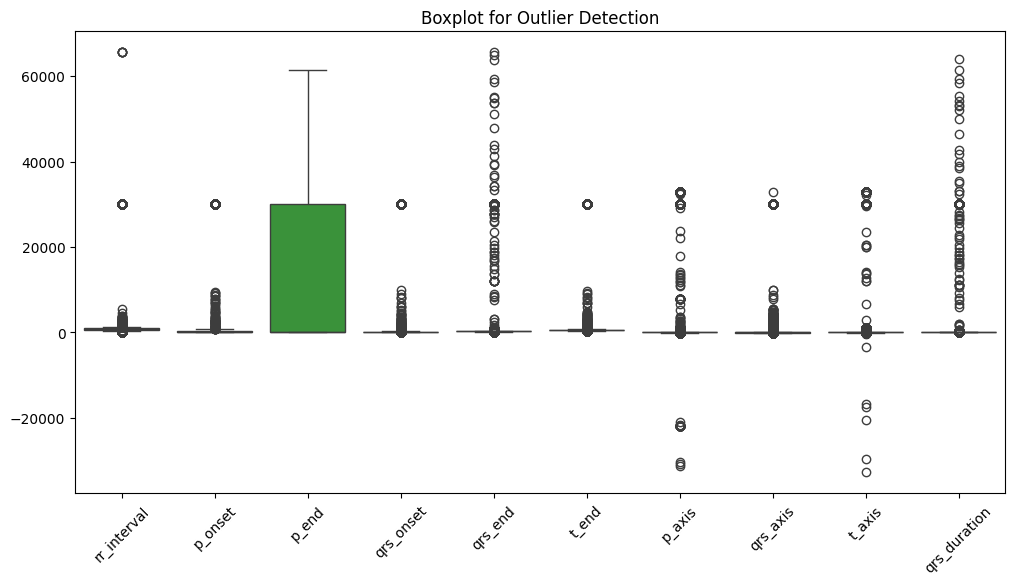

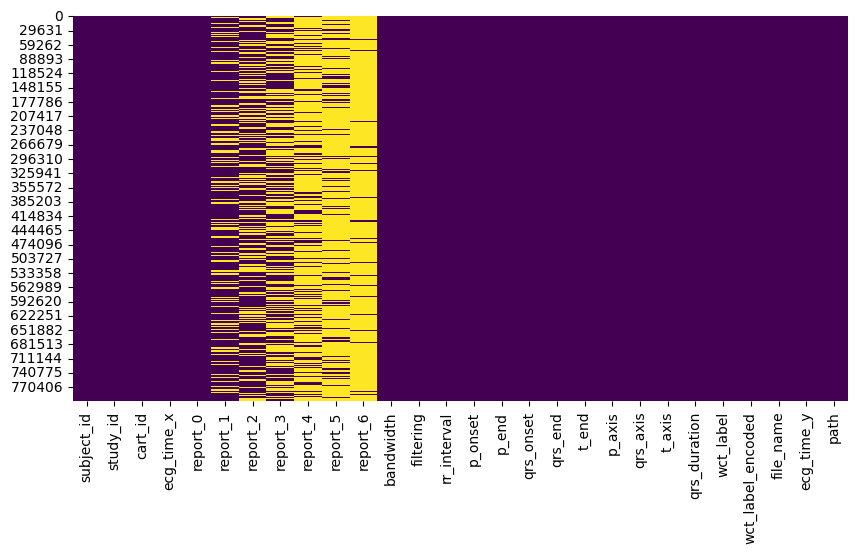

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

# Load the dataset
file_path = 'merged_ecg_data_cleaned.csv'  # Update with the actual path

df = pd.read_csv(file_path)

# Display basic information
display(df.info())
display(df.head())

# 3.2 Data Cleaning and Preprocessing Techniques
## Handling Duplicates
df = df.drop_duplicates()

## Converting ECG Time to Datetime Format with dayfirst=True to avoid warnings
df['ecg_time_x'] = pd.to_datetime(df['ecg_time_x'], errors='coerce', dayfirst=True)
df['ecg_time_y'] = pd.to_datetime(df['ecg_time_y'], errors='coerce', dayfirst=True)

## Checking for Outliers
numerical_cols = ['rr_interval', 'p_onset', 'p_end', 'qrs_onset', 'qrs_end', 't_end', 'p_axis', 'qrs_axis', 't_axis', 'qrs_duration']
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_cols])
plt.xticks(rotation=45)
plt.title('Boxplot for Outlier Detection')
plt.show()


# 3.4 Handling Missing Data and Imbalance
## Missing Value Heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.savefig("Missing_Values_Heatmap.png")
plt.show()

## Handling Missing Values with Median Imputation
imputer = SimpleImputer(strategy='median')
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

# 3.5 Data Merging and Transformation
## Encoding Categorical Variables
text_cols = ['report_0', 'report_1', 'report_2', 'report_3', 'report_4', 'report_5', 'report_6', 'filtering', 'wct_label']
le = LabelEncoder()

for col in text_cols:
    df[col] = le.fit_transform(df[col].astype(str))

## Normalizing Important Features
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])




In [25]:
import pandas as pd

# Define the required features
features = [
    "subject_id", "study_id", "cart_id", "ecg_time_x",
    "report_0", "report_1", "report_2", "report_3", "report_4", "report_5", "report_6",
    "bandwidth", "filtering", "rr_interval", "p_onset", "p_end",
    "qrs_onset", "qrs_end", "t_end", "p_axis", "qrs_axis", "t_axis",
    "qrs_duration", "wct_label", "wct_label_encoded",
    "file_name", "ecg_time_y", "path"
]

# Load dataset
df = pd.read_csv("merged_ecg_data_cleaned.csv", usecols=features)

# Separate categorical and numerical columns
categorical_features = ["wct_label", "wct_label_encoded", "file_name", "path"]
numerical_features = [col for col in features if col not in categorical_features]

# Compute summary statistics for numerical columns
num_summary = df[numerical_features].describe().T  # Transpose for better readability

# Count unique values for categorical columns
cat_summary = df[categorical_features].nunique().reset_index()
cat_summary.columns = ["Feature", "Unique Values"]

# Combine into a single summary table
summary_table = pd.concat(
    [num_summary[["mean", "min", "max"]], cat_summary.set_index("Feature")], axis=0
)

# Display the summary table
summary_table


,mean,min,max,Unique Values
subject_id,1.500319e+07,10000032.0,19999987.0,NaN
study_id,4.499991e+07,40000017.0,49999993.0,NaN
cart_id,6.579536e+06,6037973.0,6998078.0,NaN
rr_interval,8.656037e+02,0.0,65535.0,NaN
p_onset,4.702879e+03,0.0,29999.0,NaN
p_end,8.745082e+03,0.0,61440.0,NaN
qrs_onset,2.834230e+02,0.0,29999.0,NaN
qrs_end,3.916587e+02,0.0,65534.0,NaN
t_end,6.886465e+02,235.0,29999.0,NaN
p_axis,4.957353e+03,-31248.0,32767.0,NaN


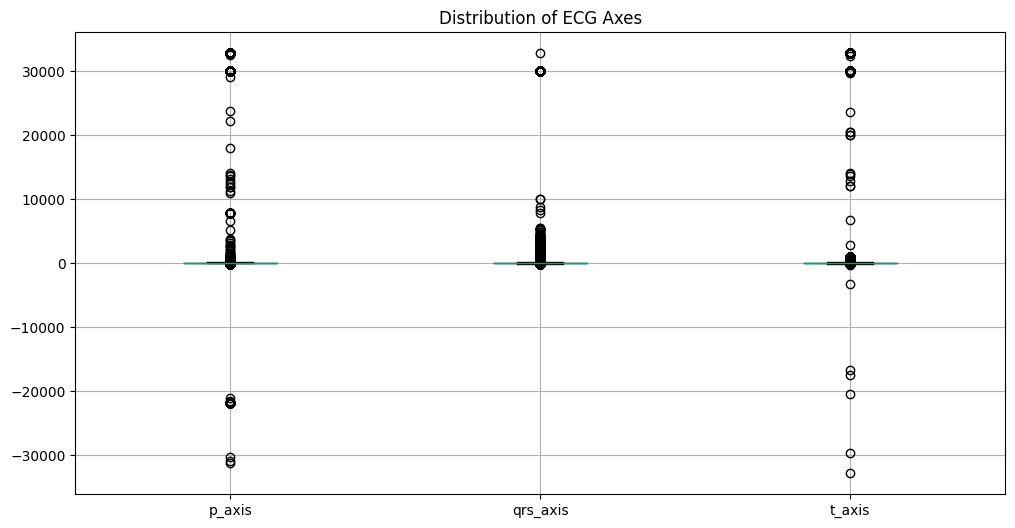

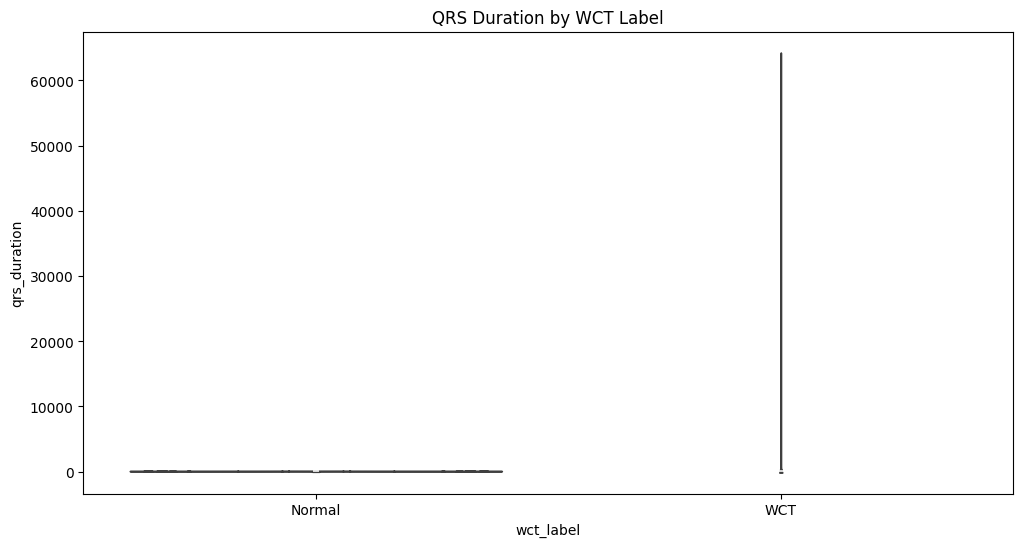

In [2]:
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  

# 1. Load the entire dataset  
df = pd.read_csv('merged_ecg_data_cleaned.csv')  

# Box plot of axial measurements  
axes_data = df[['p_axis', 'qrs_axis', 't_axis']]  
plt.figure(figsize=(12,6))  
axes_data.boxplot()  
plt.title('Distribution of ECG Axes')  
plt.show()  

# Violin plot of QRS duration by WCT label  
plt.figure(figsize=(12,6))  
sns.violinplot(x='wct_label', y='qrs_duration', data=df)  
plt.title('QRS Duration by WCT Label')  
plt.show()  

# **Feature Selection and Extraction**

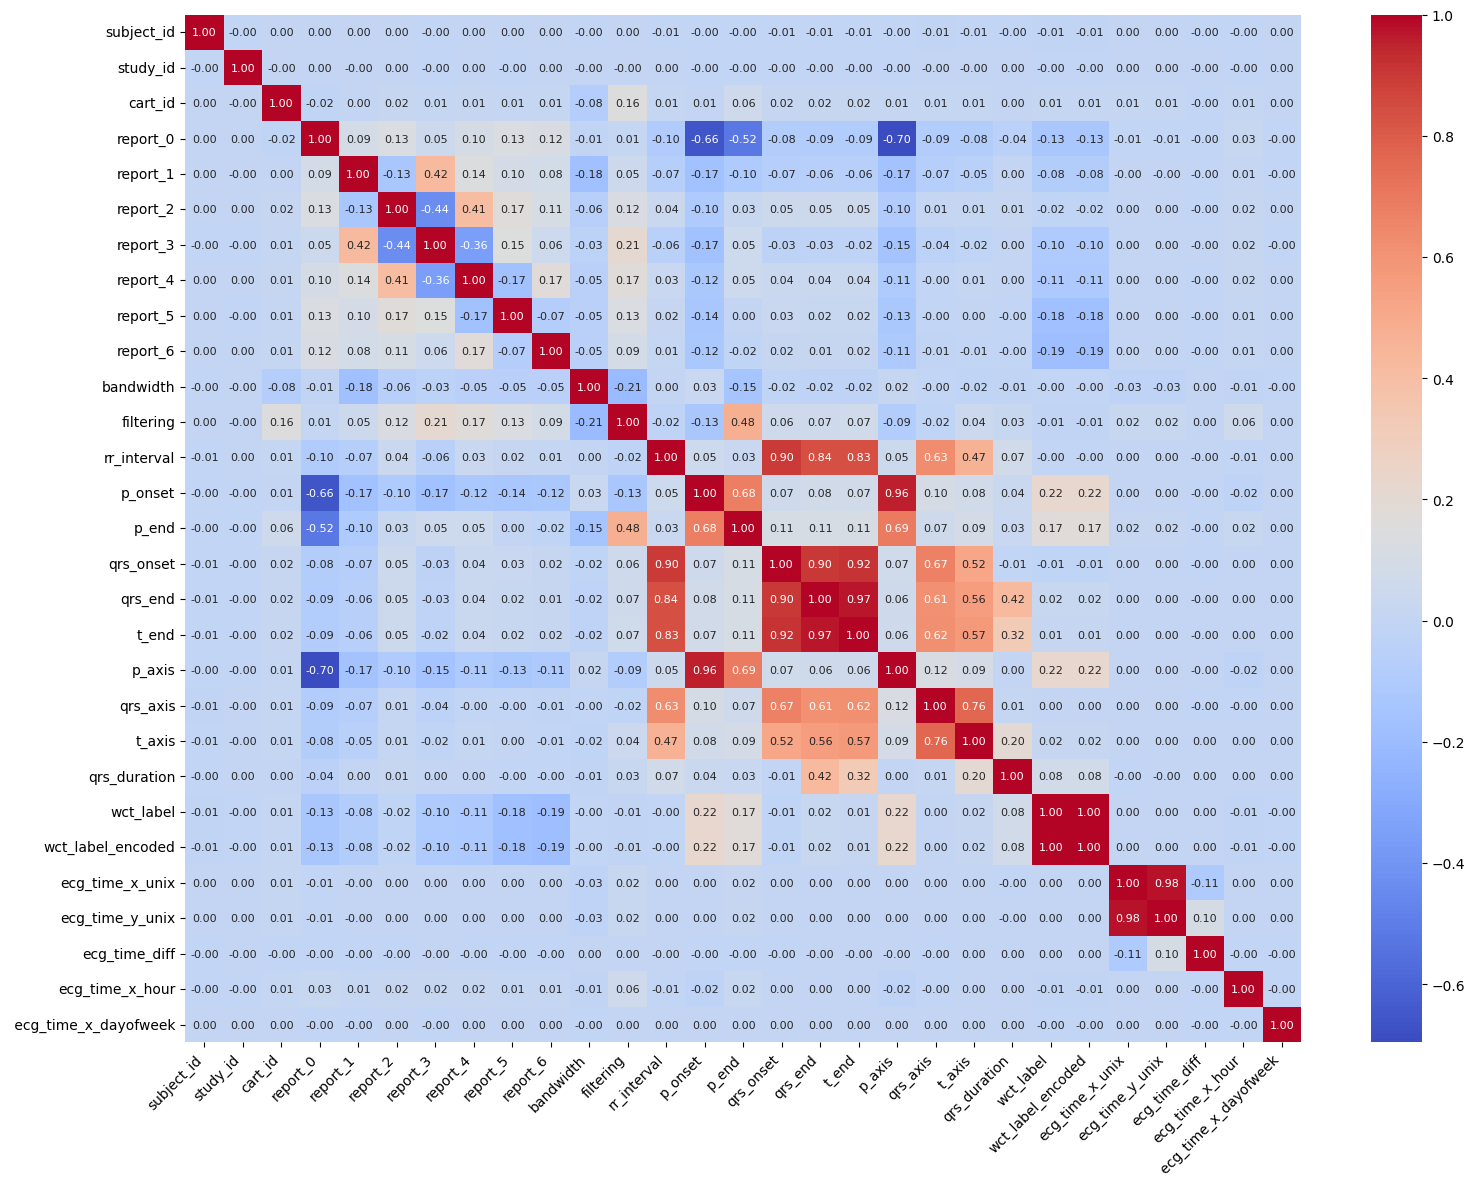

In [18]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

# Load the dataset
df = pd.read_csv("merged_ecg_data_cleaned.csv")

# Display first few rows to understand the structure
df.head()

# Convert 'ecg_time_x' and 'ecg_time_y' to datetime format
df['ecg_time_x'] = pd.to_datetime(df['ecg_time_x'], errors='coerce', dayfirst=True)
df['ecg_time_y'] = pd.to_datetime(df['ecg_time_y'], errors='coerce', dayfirst=True)

# Extract meaningful time features
df['ecg_time_x_unix'] = df['ecg_time_x'].astype('int64') // 10**9  # Convert to Unix timestamp
df['ecg_time_y_unix'] = df['ecg_time_y'].astype('int64') // 10**9
df['ecg_time_diff'] = (df['ecg_time_y'] - df['ecg_time_x']).dt.total_seconds()  # Time difference in seconds
df['ecg_time_x_hour'] = df['ecg_time_x'].dt.hour  # Hour of the day
df[' ecg_time_x_dayofweek'] = df['ecg_time_x'].dt.dayofweek  # Day of the week

# Drop original datetime columns
df.drop(columns=['ecg_time_x', 'ecg_time_y'], inplace=True)

# Encode categorical ECG report columns
text_cols = ['report_0', 'report_1', 'report_2', 'report_3', 'report_4', 'report_5', 'report_6']
le = LabelEncoder()
for col in text_cols:
    df[col] = le.fit_transform(df[col].astype(str))

# Extract numerical values from 'bandwidth' column (e.g., "0.005-150 Hz" -> 0.005)
df['bandwidth'] = df['bandwidth'].str.extract(r'(\d+\.?\d*)').astype(float)

# Encode 'filtering' column
df['filtering'] = le.fit_transform(df['filtering'].astype(str))

# Encode 'wct_label' column
df['wct_label'] = le.fit_transform(df['wct_label'].astype(str))

# Drop non-numeric columns that are not useful for analysis
df.drop(columns=['file_name', 'path'], inplace=True)

# Fill missing values with the median
df.fillna(df.median(), inplace=True)

# --------------------- FEATURE SELECTION AND VISUALIZATION ---------------------

# 1️⃣ Generate Correlation Heatmap to Identify Important Features
plt.figure(figsize=(16, 12))  # Increase the figure size
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt='.2f', annot_kws={"size": 8})  # Add annotations and adjust font size
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate and adjust font size for x-axis labels
plt.yticks(rotation=0, fontsize=10)  # Adjust y-axis labels
plt.tight_layout()  # Automatically adjusts subplots to fit into figure area
plt.savefig("feature_correlation_heatmap.png")  # Save the figure
plt.show()


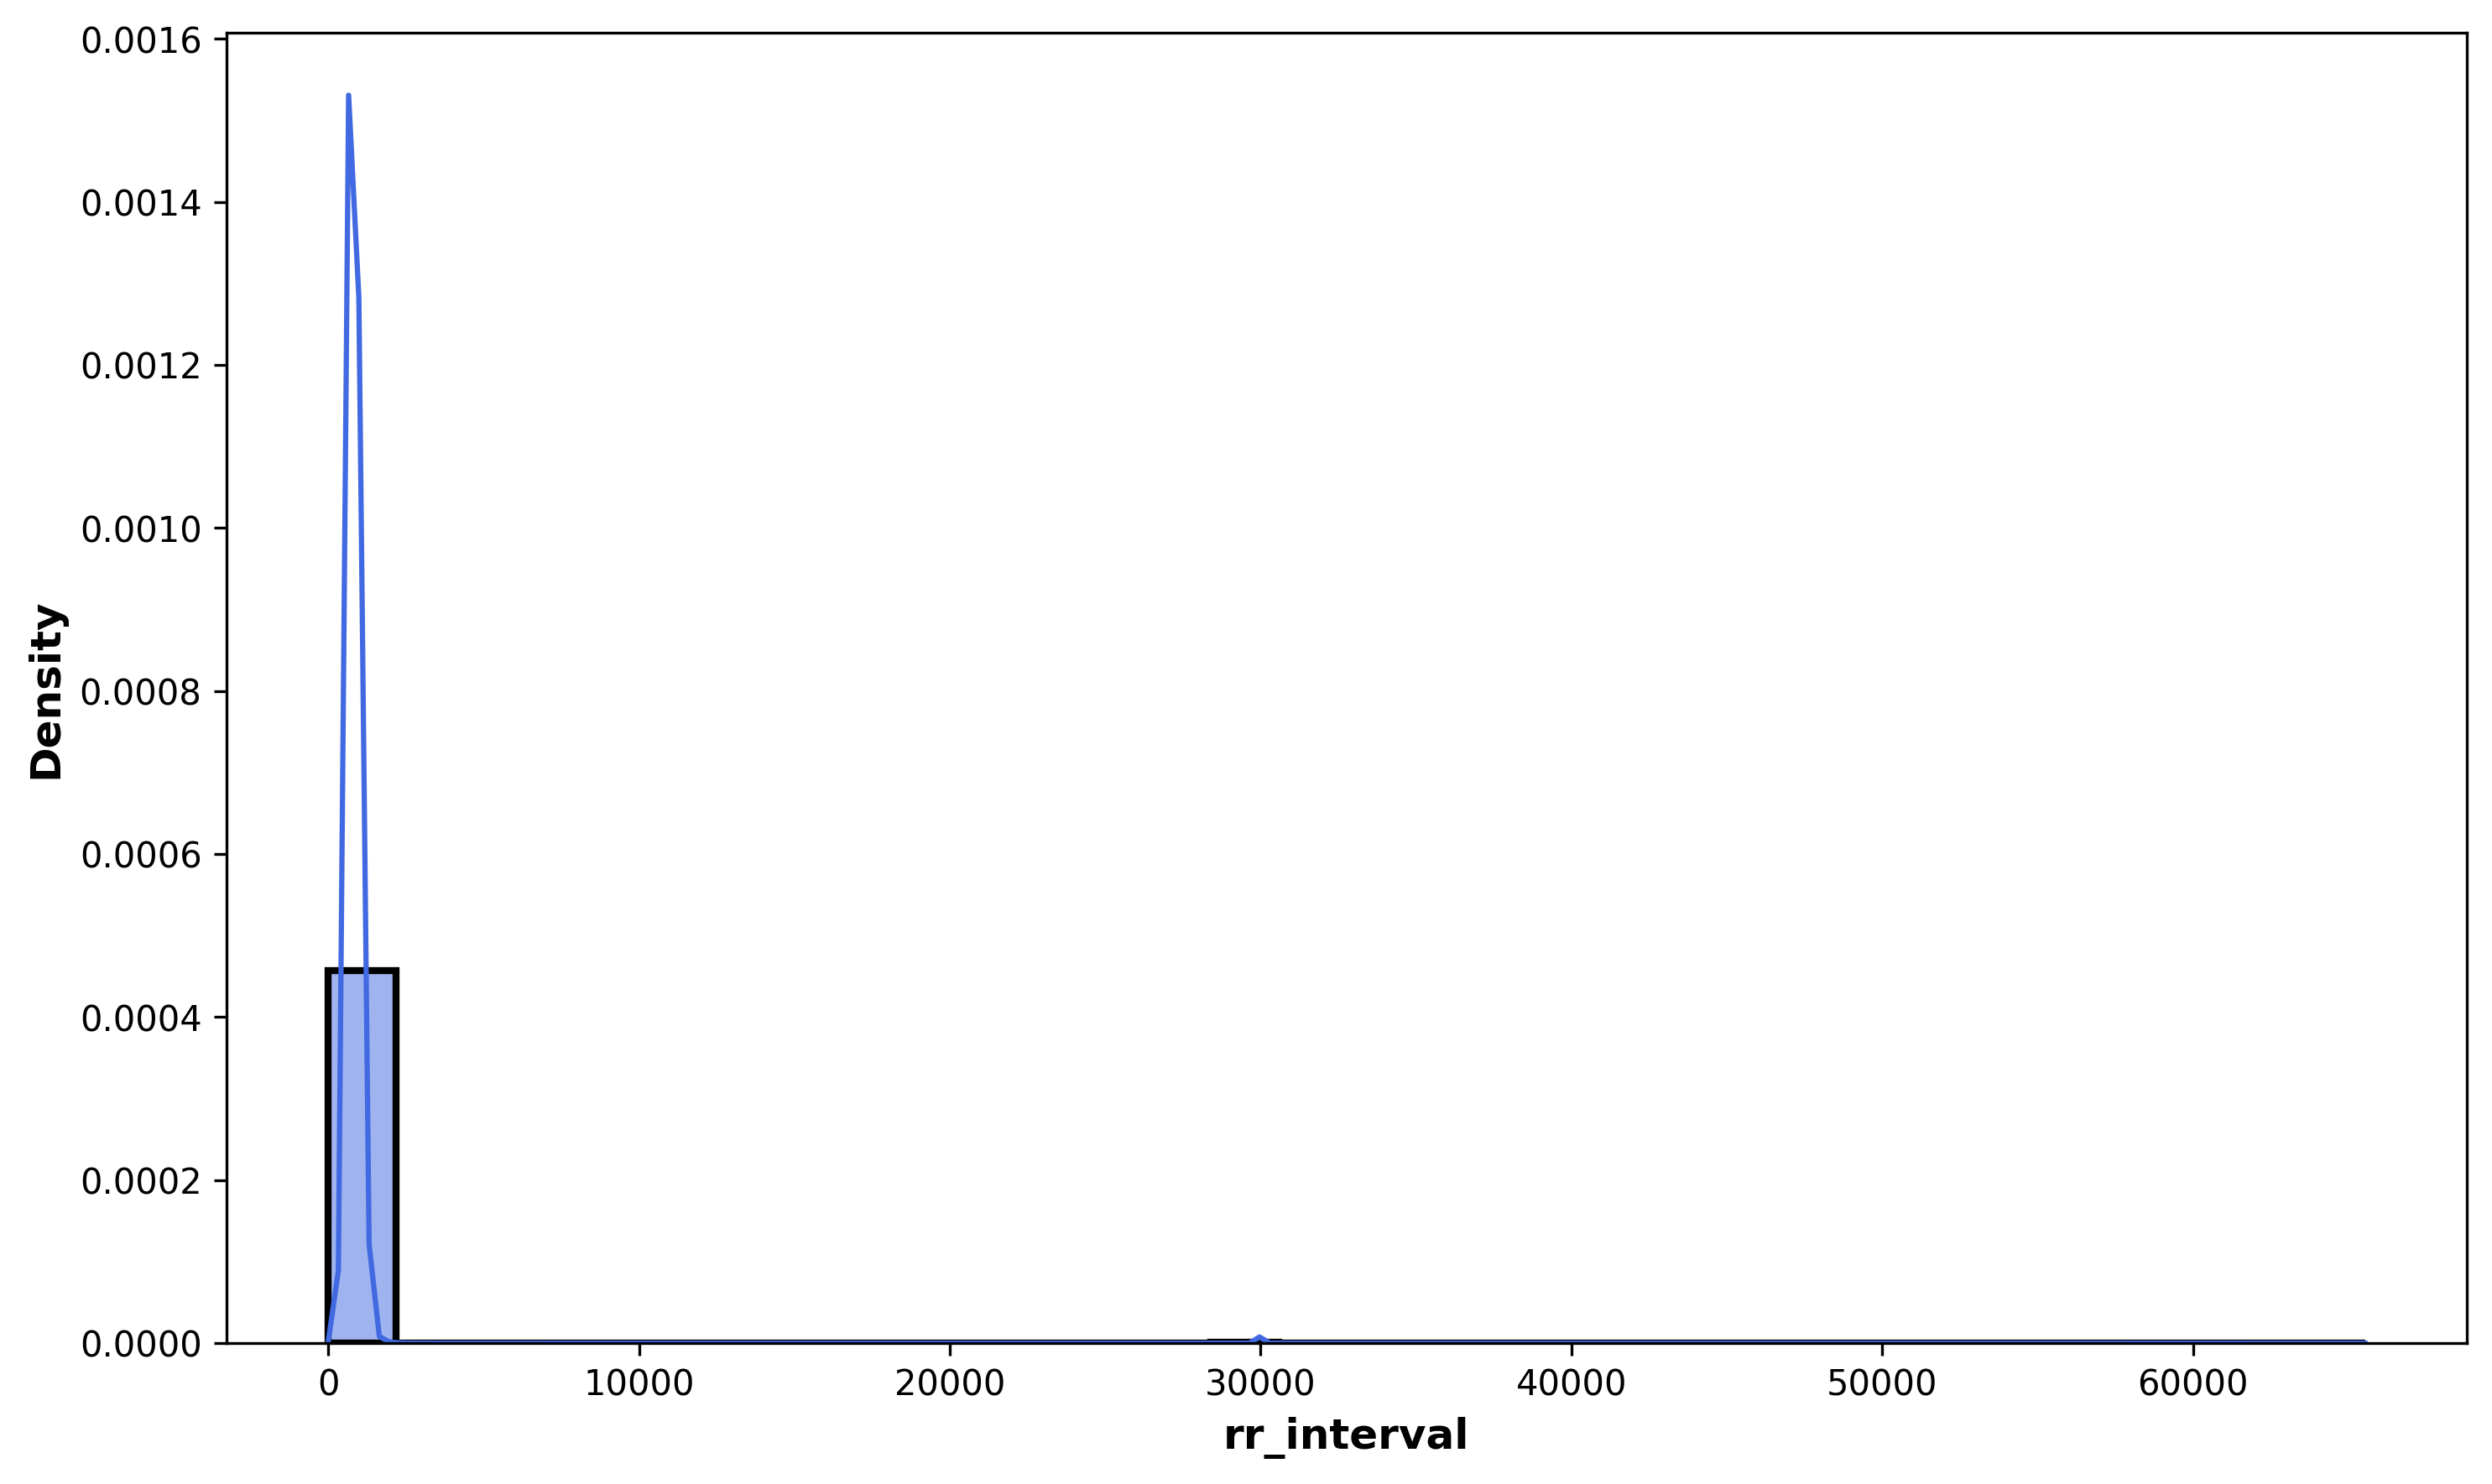

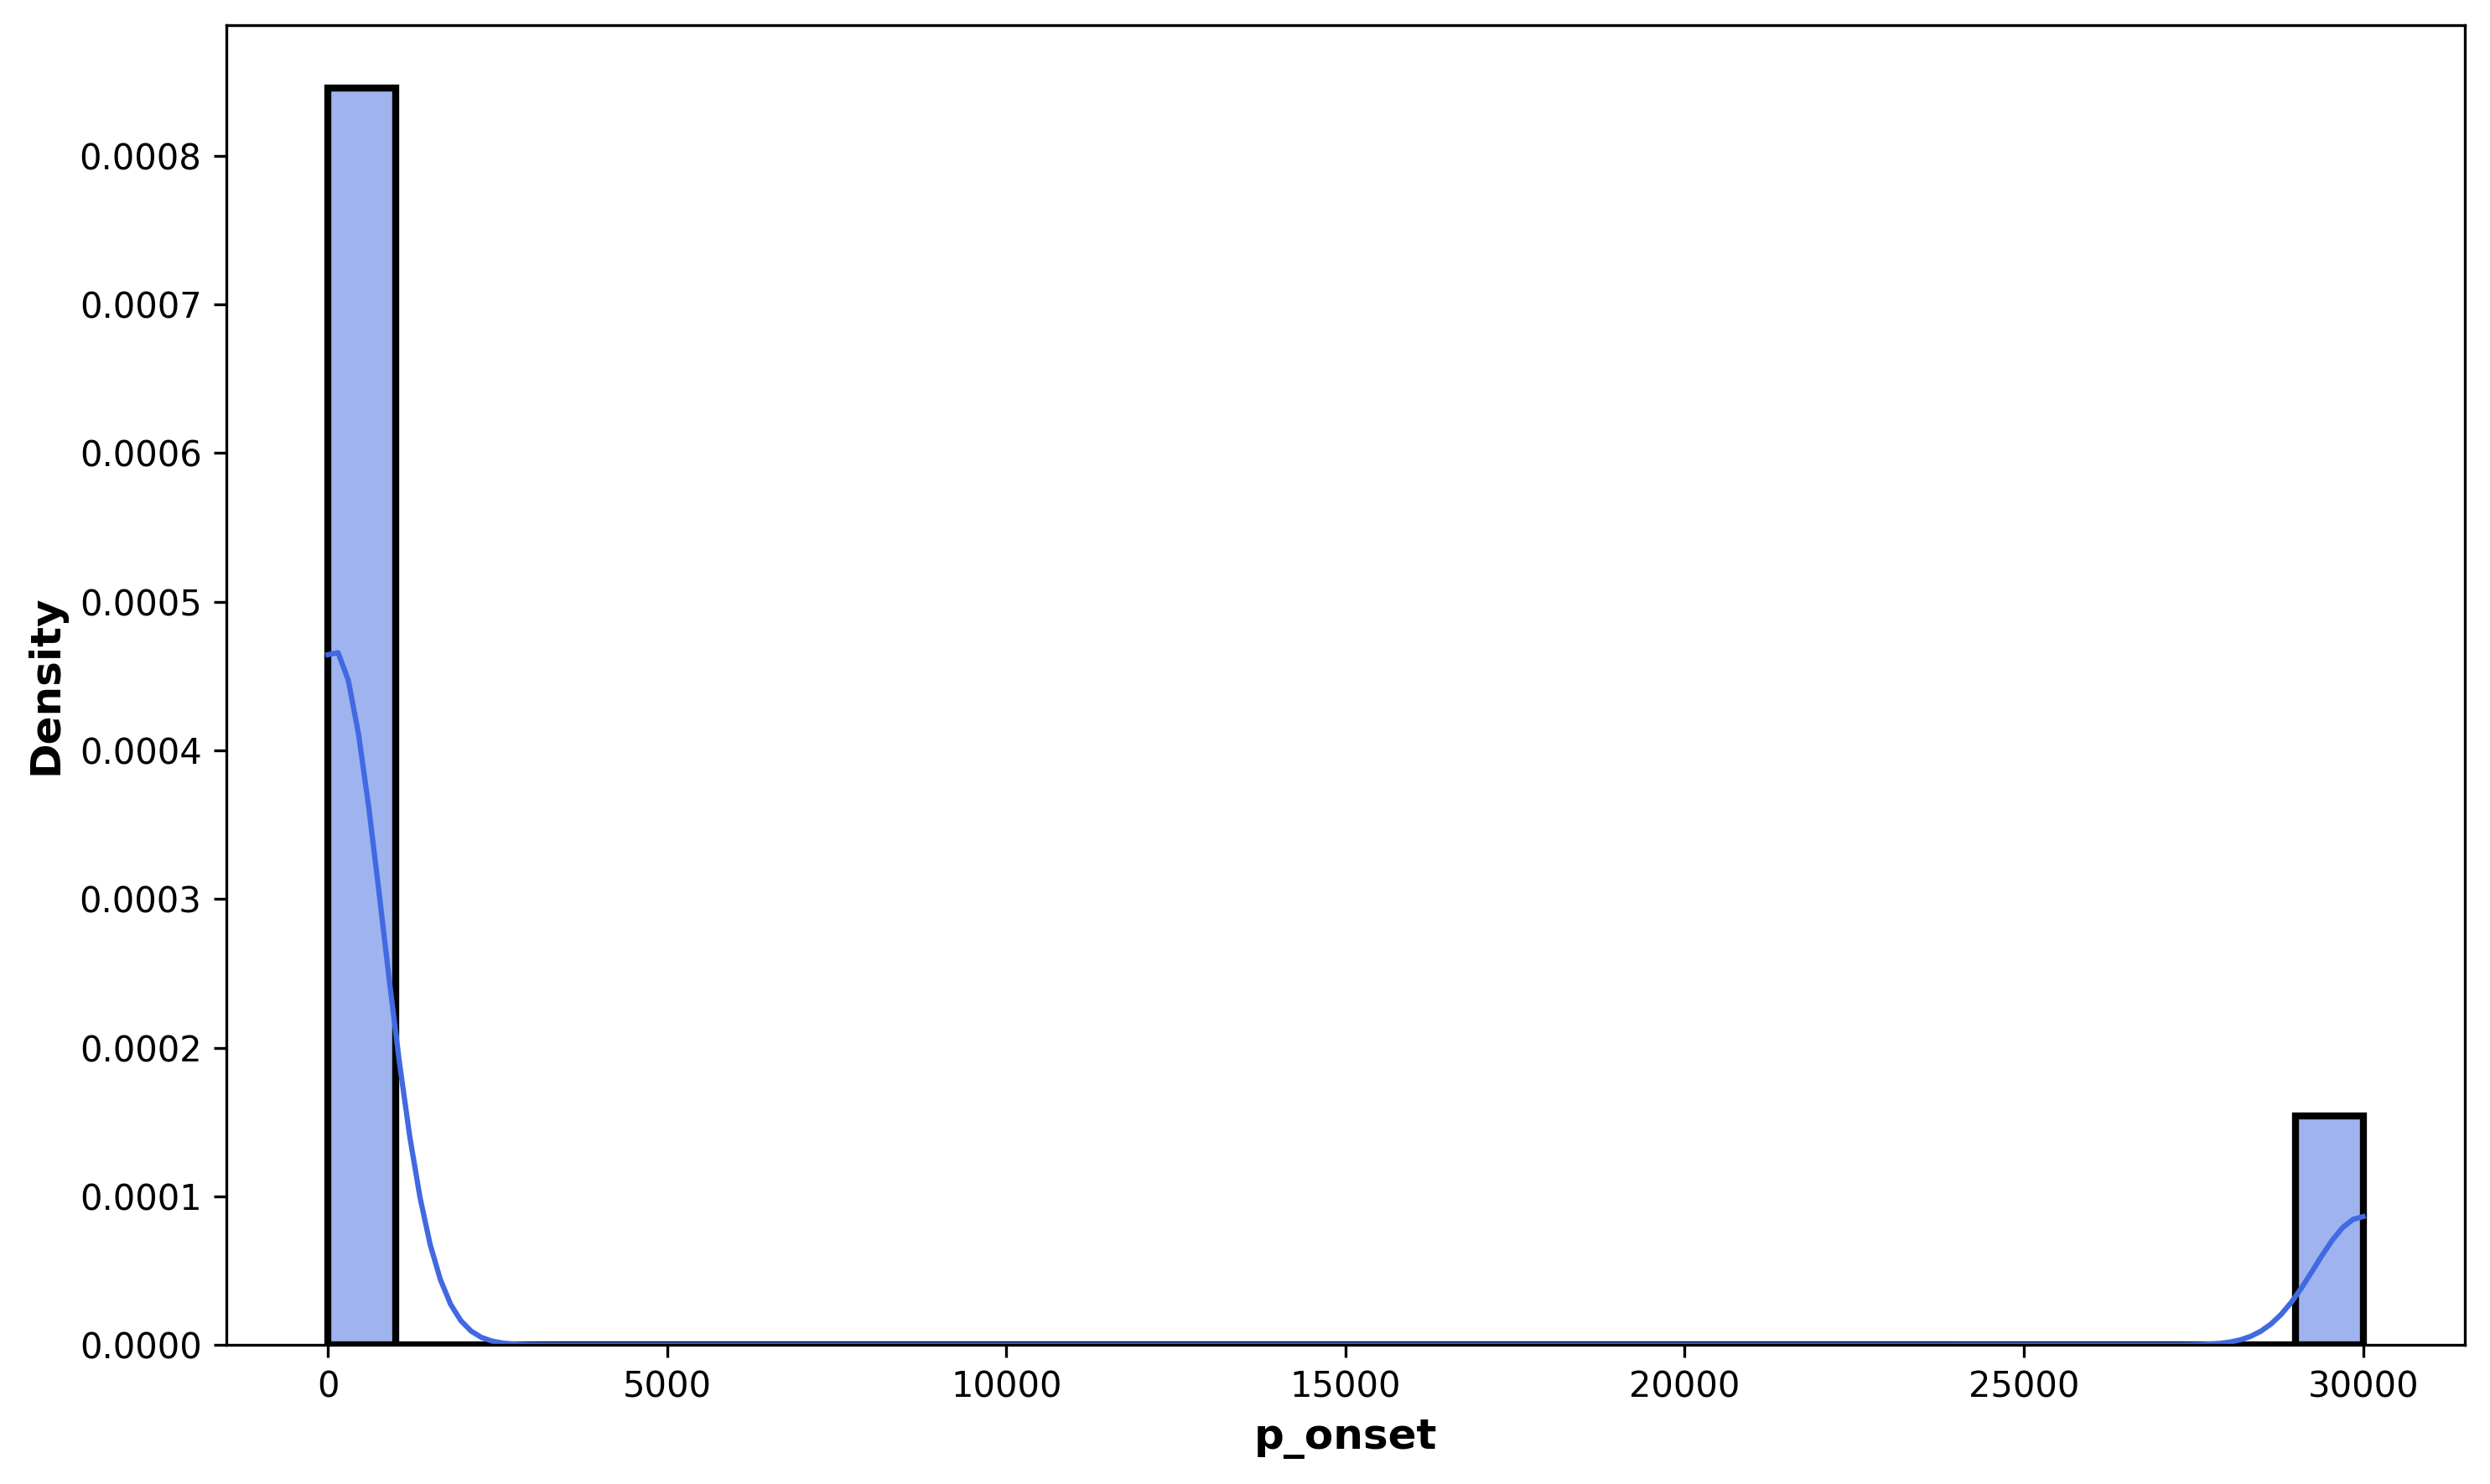

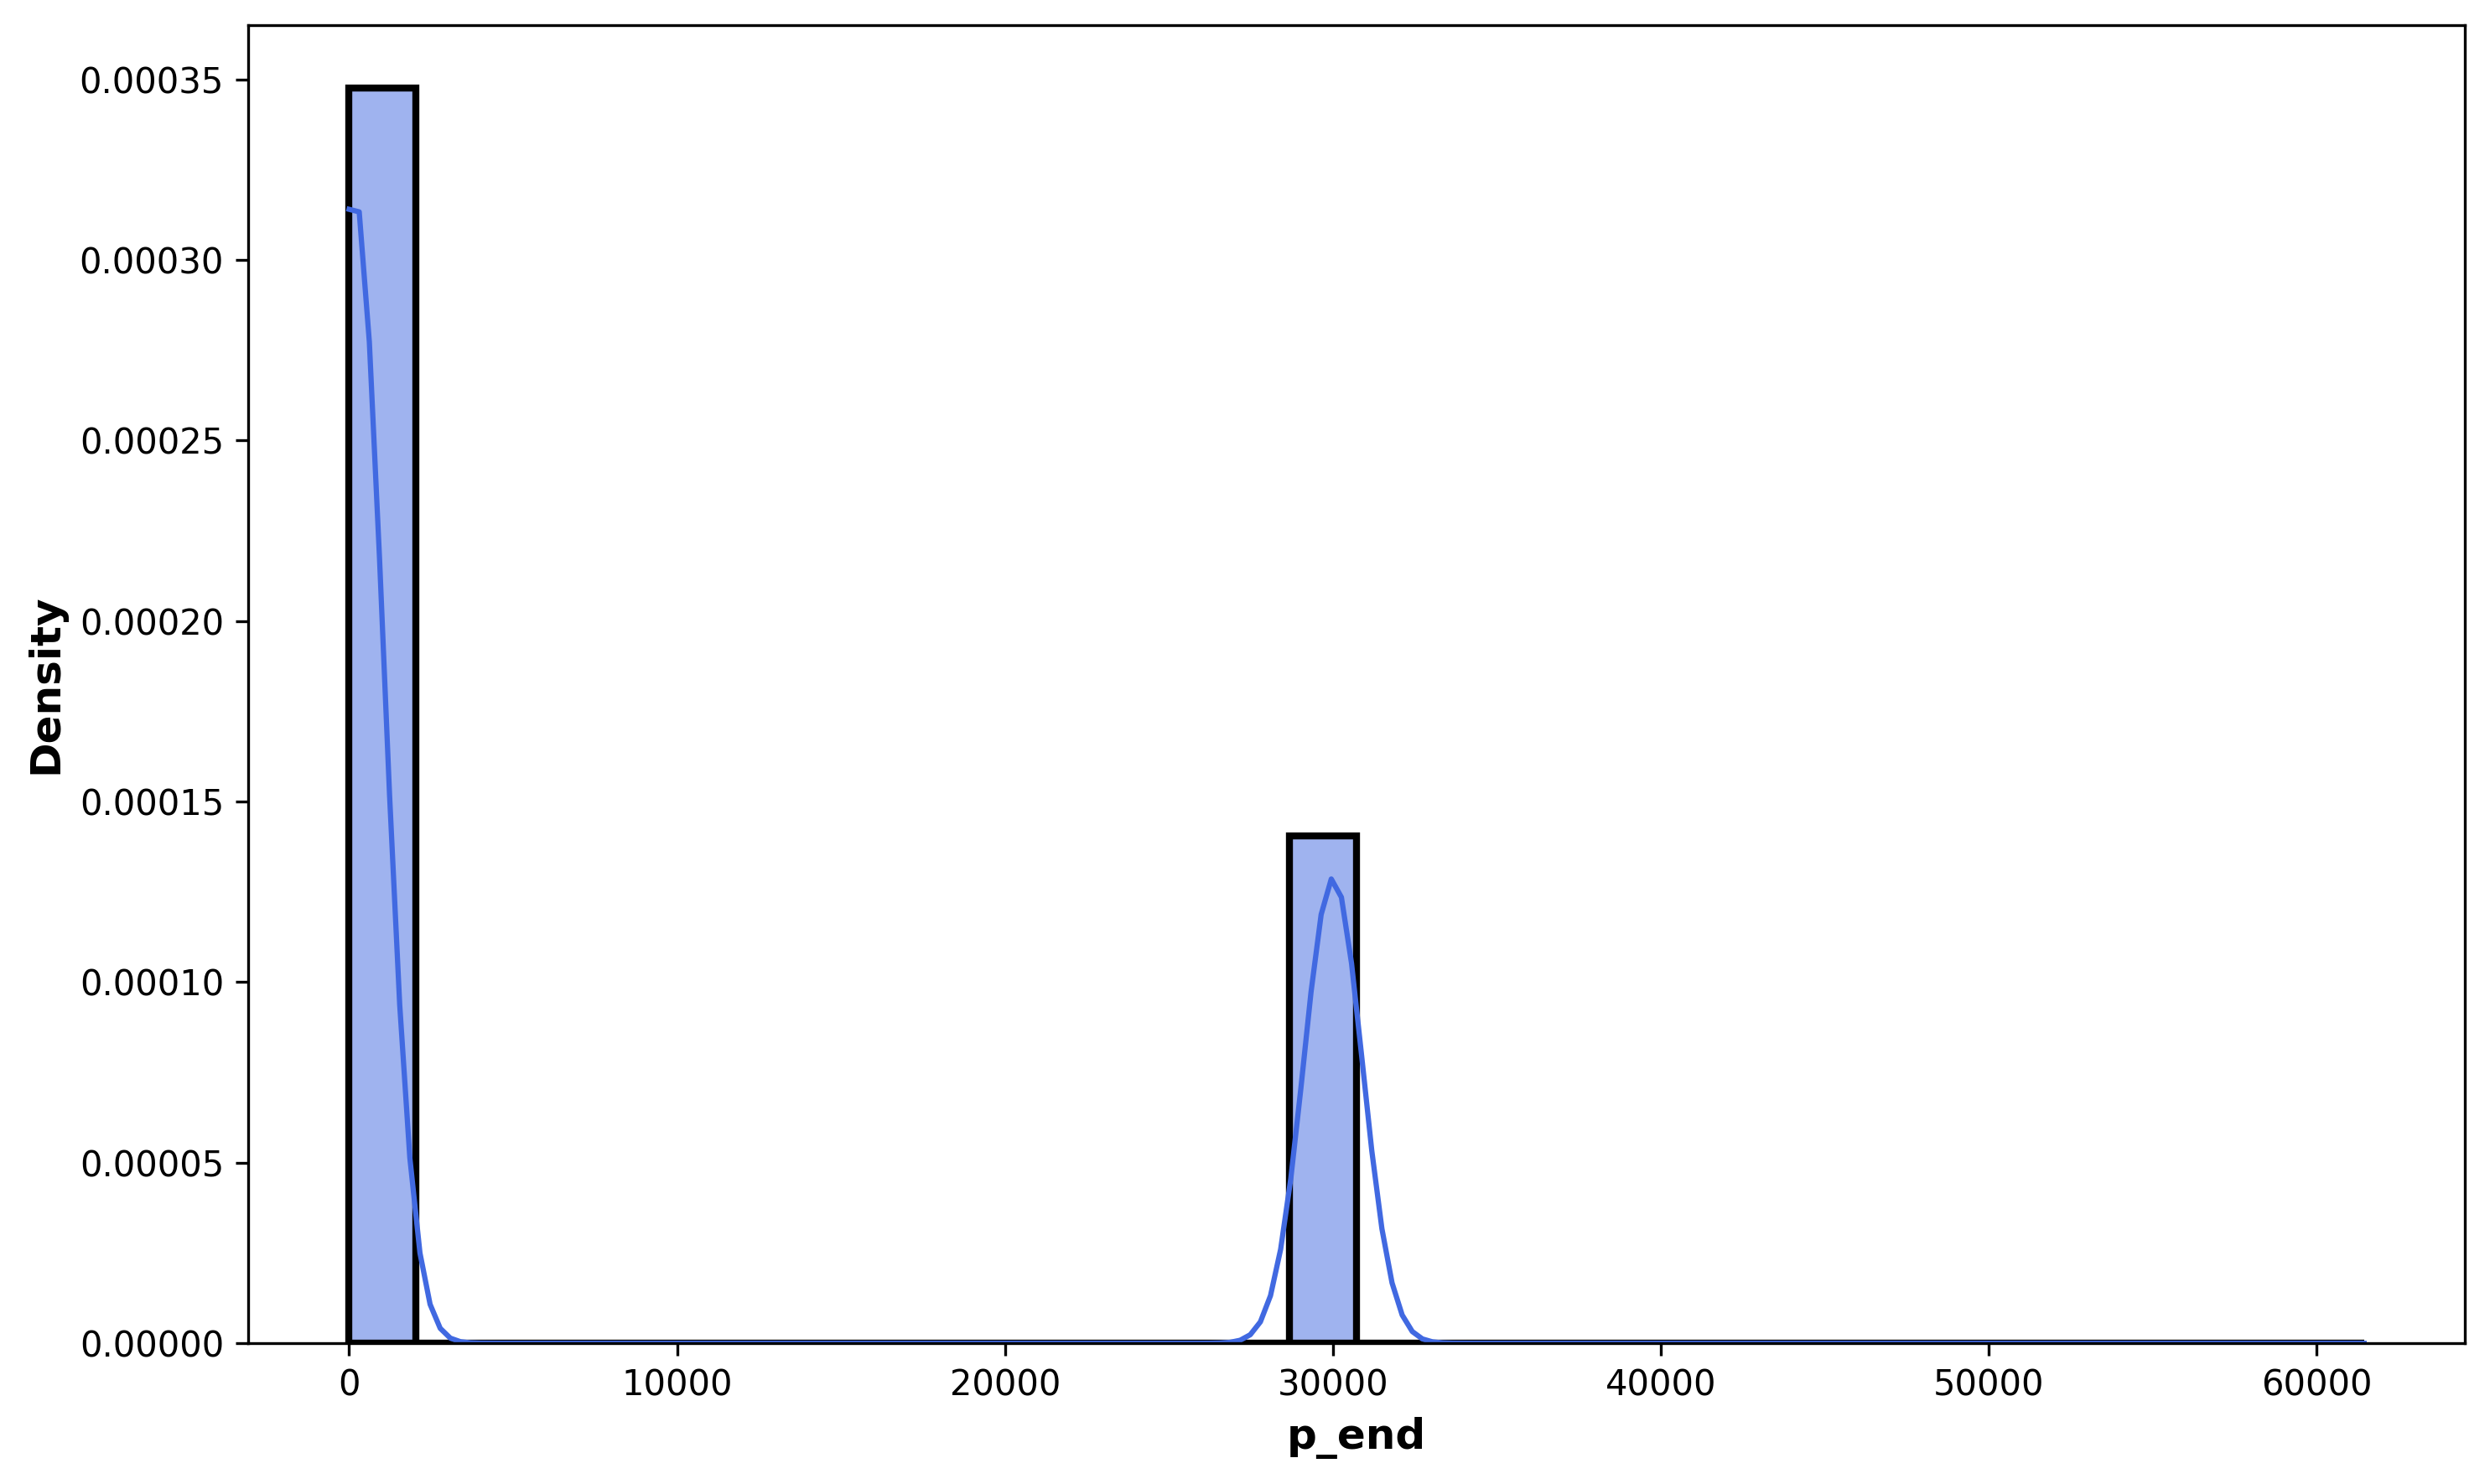

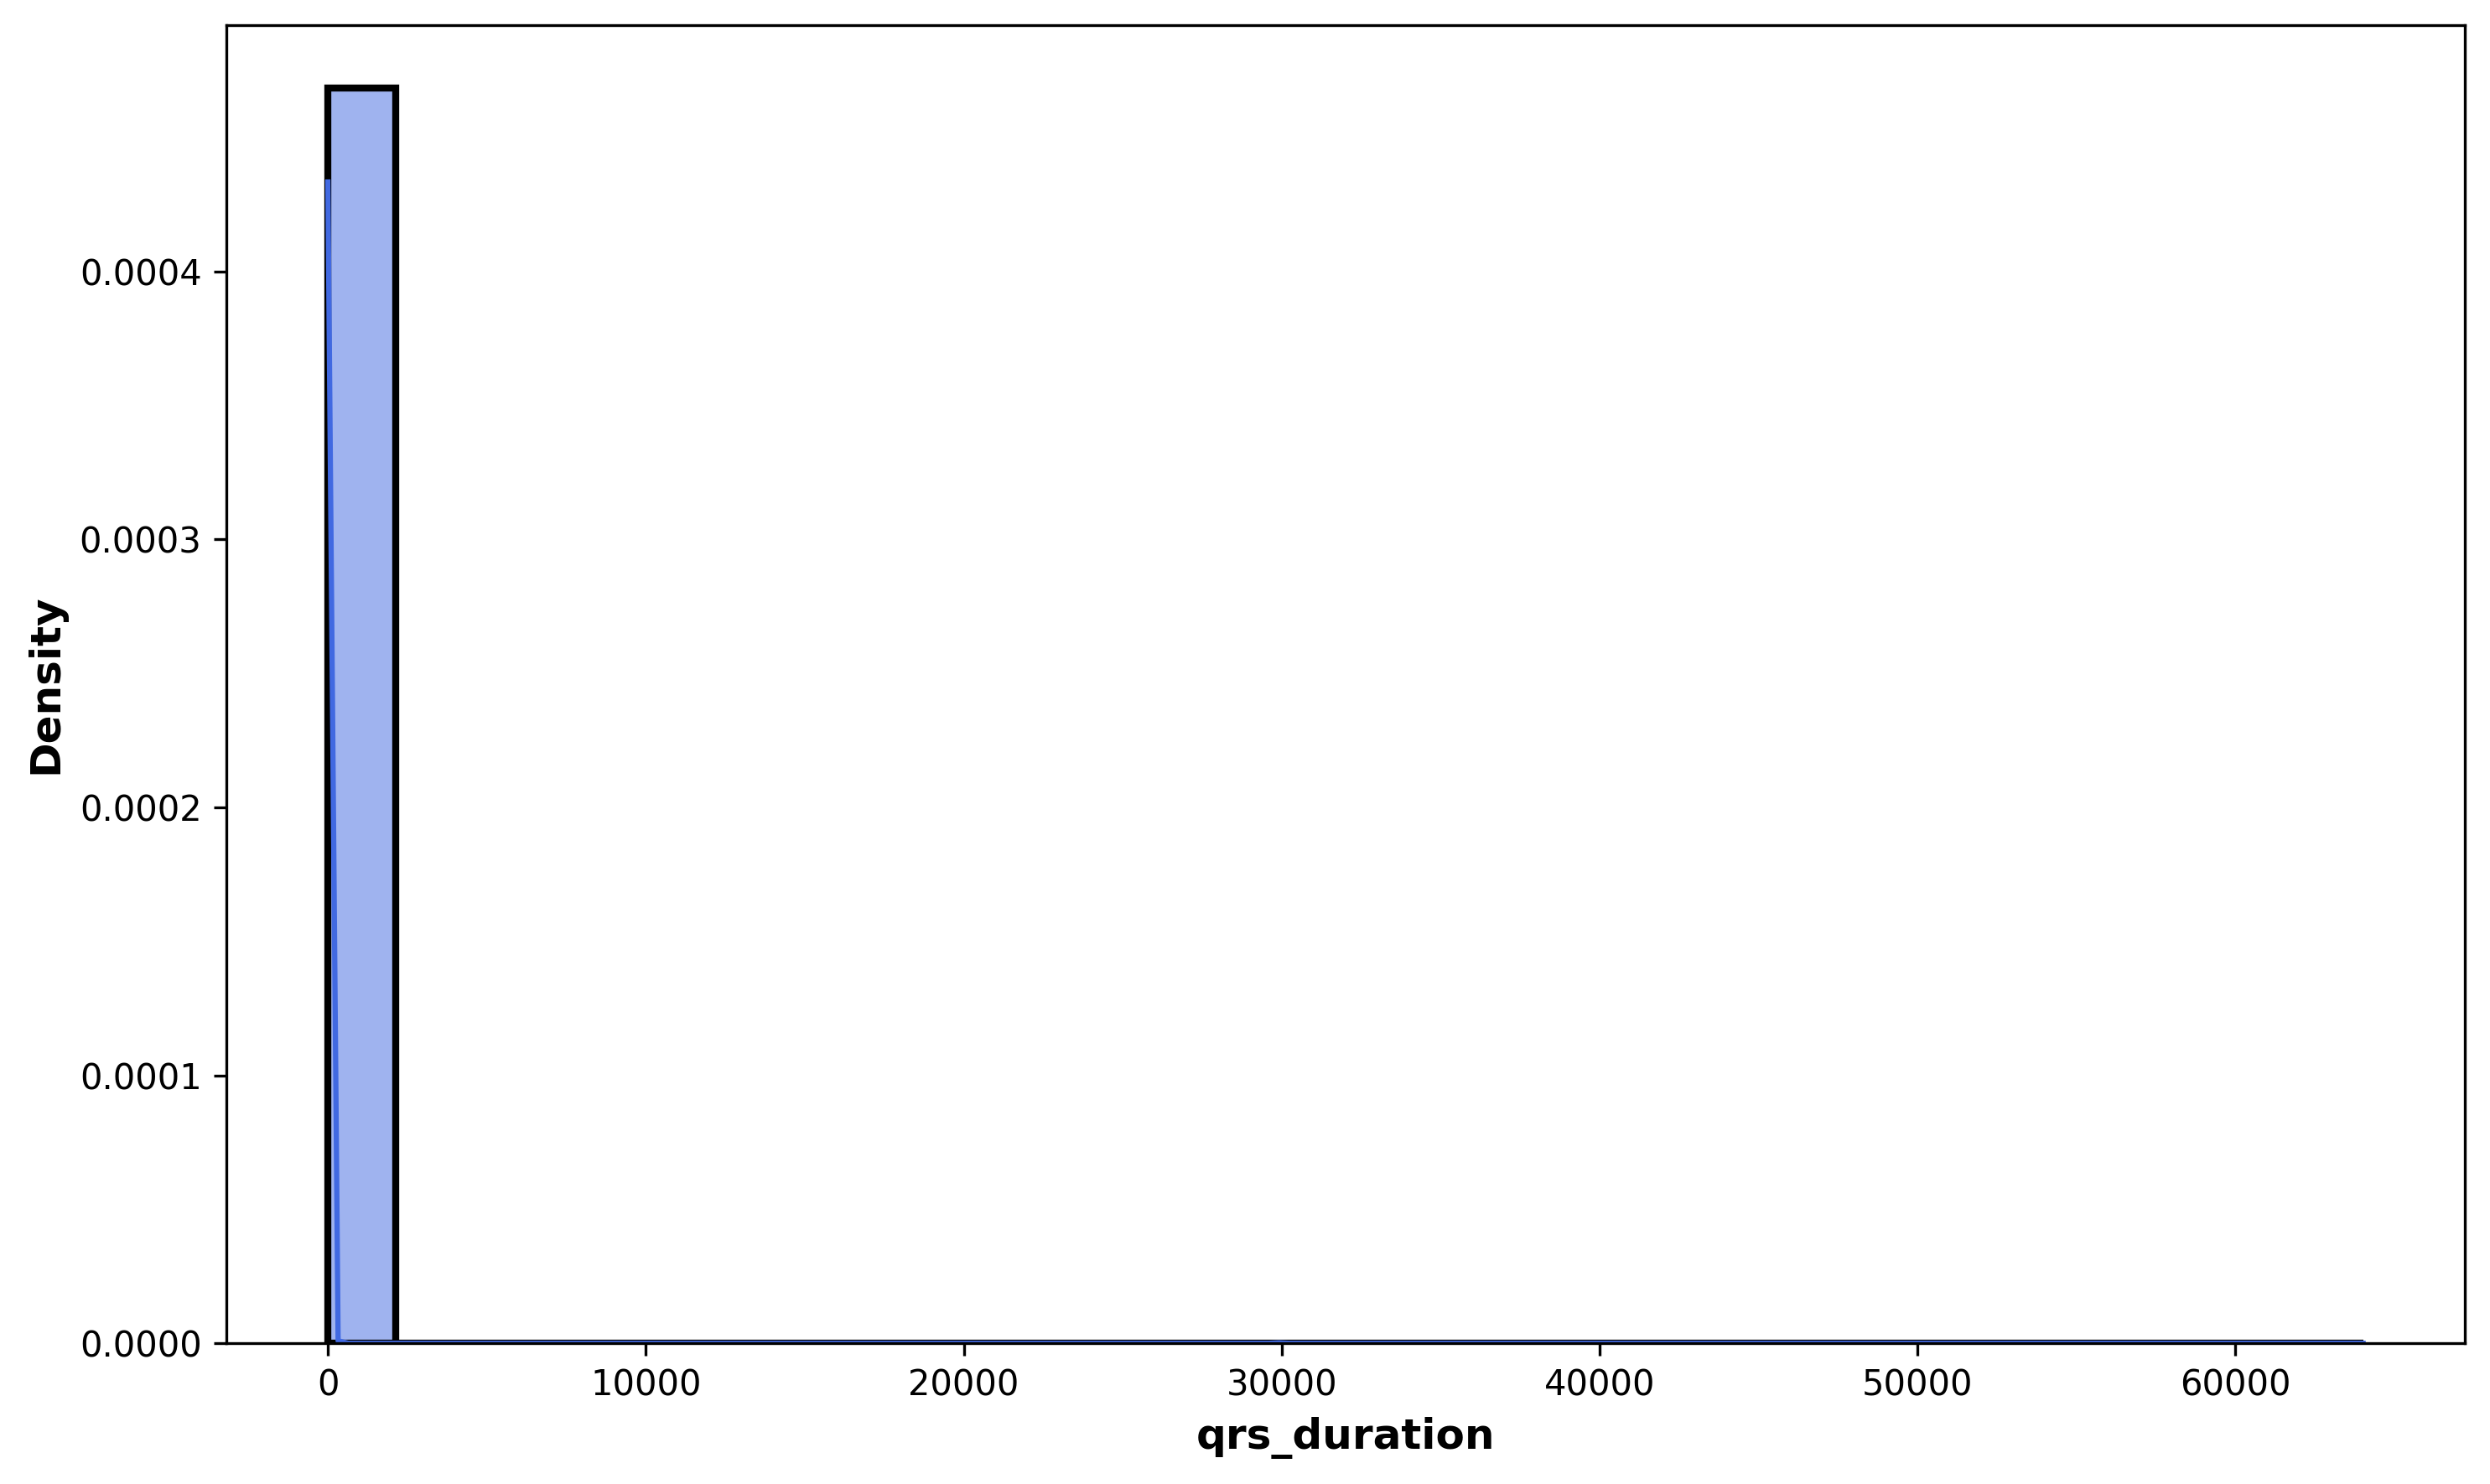

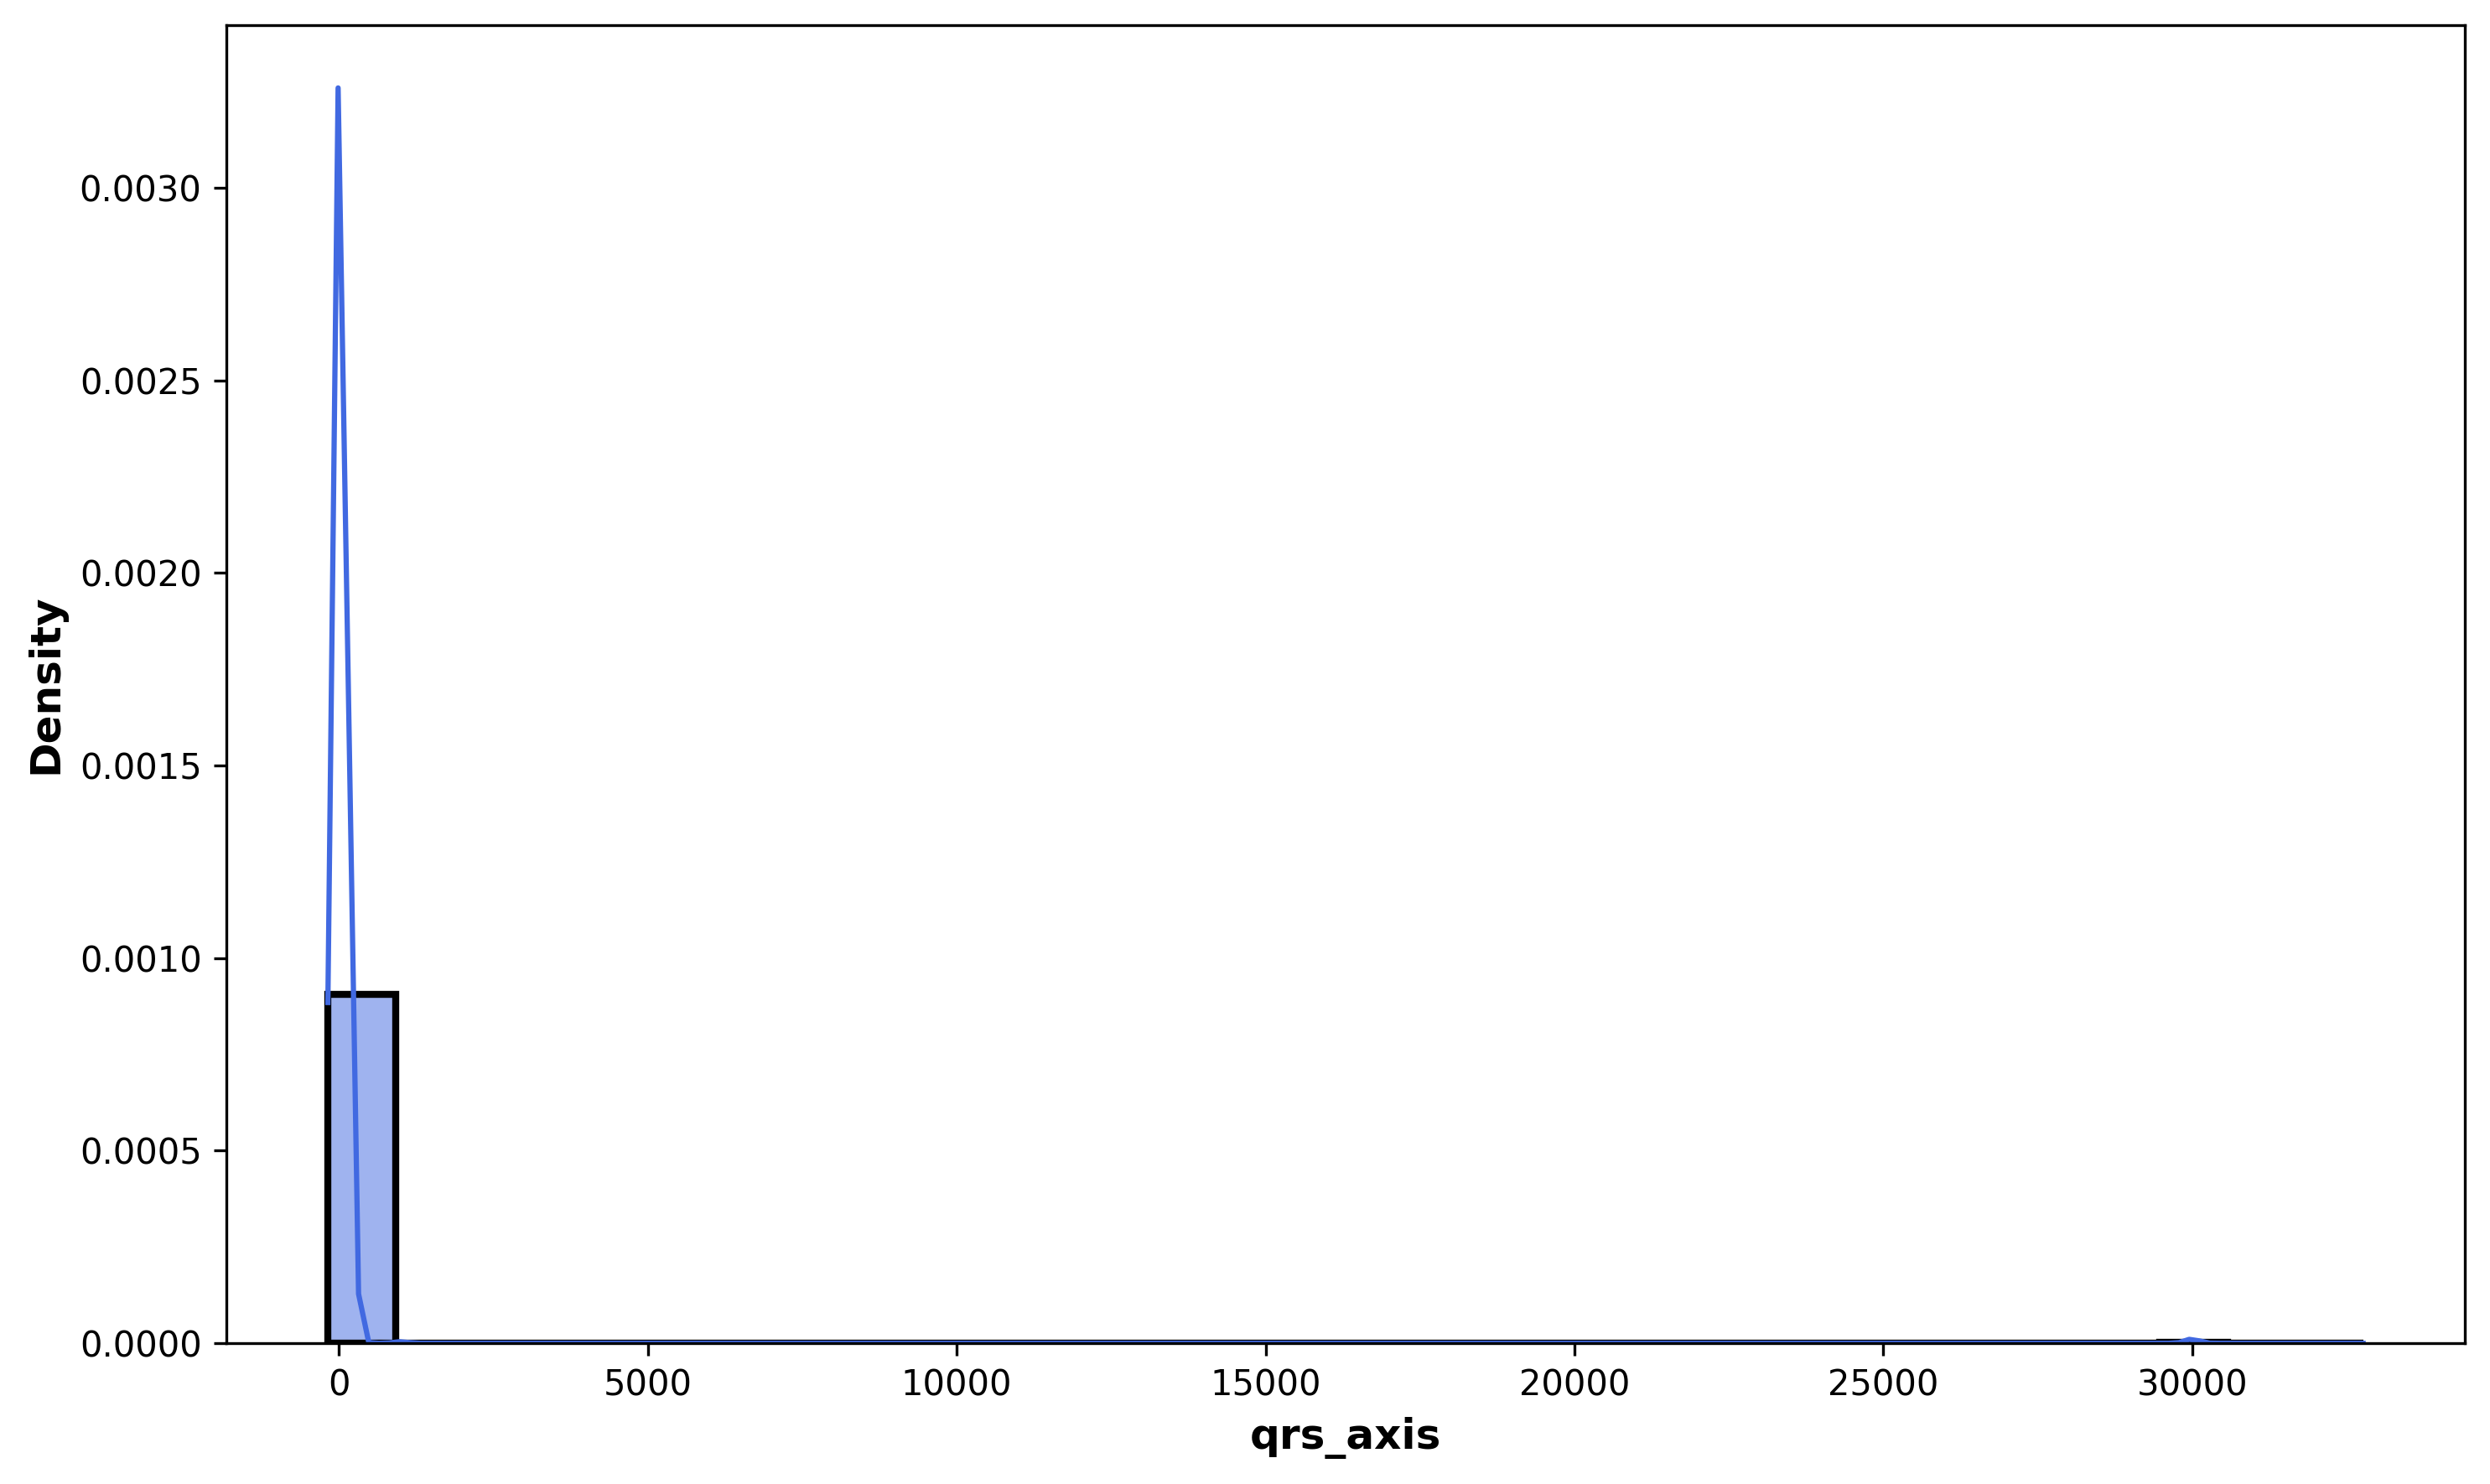

In [20]:
# 2️⃣ Generate Distribution Plots for Key ECG Features
features_to_plot = ['rr_interval', 'p_onset', 'p_end', 'qrs_duration', 'qrs_axis']
for feature in features_to_plot:
    plt.figure(figsize=(10, 6), dpi=300)  # Increase the resolution (dpi) and adjust the figure size
    sns.histplot(df[feature], bins=30, kde=True, color="royalblue", stat="density", linewidth=2)  # Set a standard color and line width
    plt.xlabel(feature, fontsize=12, fontweight='bold')  # Set font size and weight for better readability
    plt.ylabel("Density", fontsize=12, fontweight='bold')  # Label y-axis as "Density"
    plt.tight_layout()  # Ensure that everything fits well in the figure
    plt.savefig(f"{feature}_distribution.png", dpi=300)  # Save each figure with high resolution
    plt.show()


Non-numeric columns: Index(['ecg_time_x', 'report_0', 'report_1', 'report_2', 'report_3',
       'report_4', 'report_5', 'report_6', 'bandwidth', 'filtering',
       'wct_label', 'ecg_time_y', 'path'],
      dtype='object')


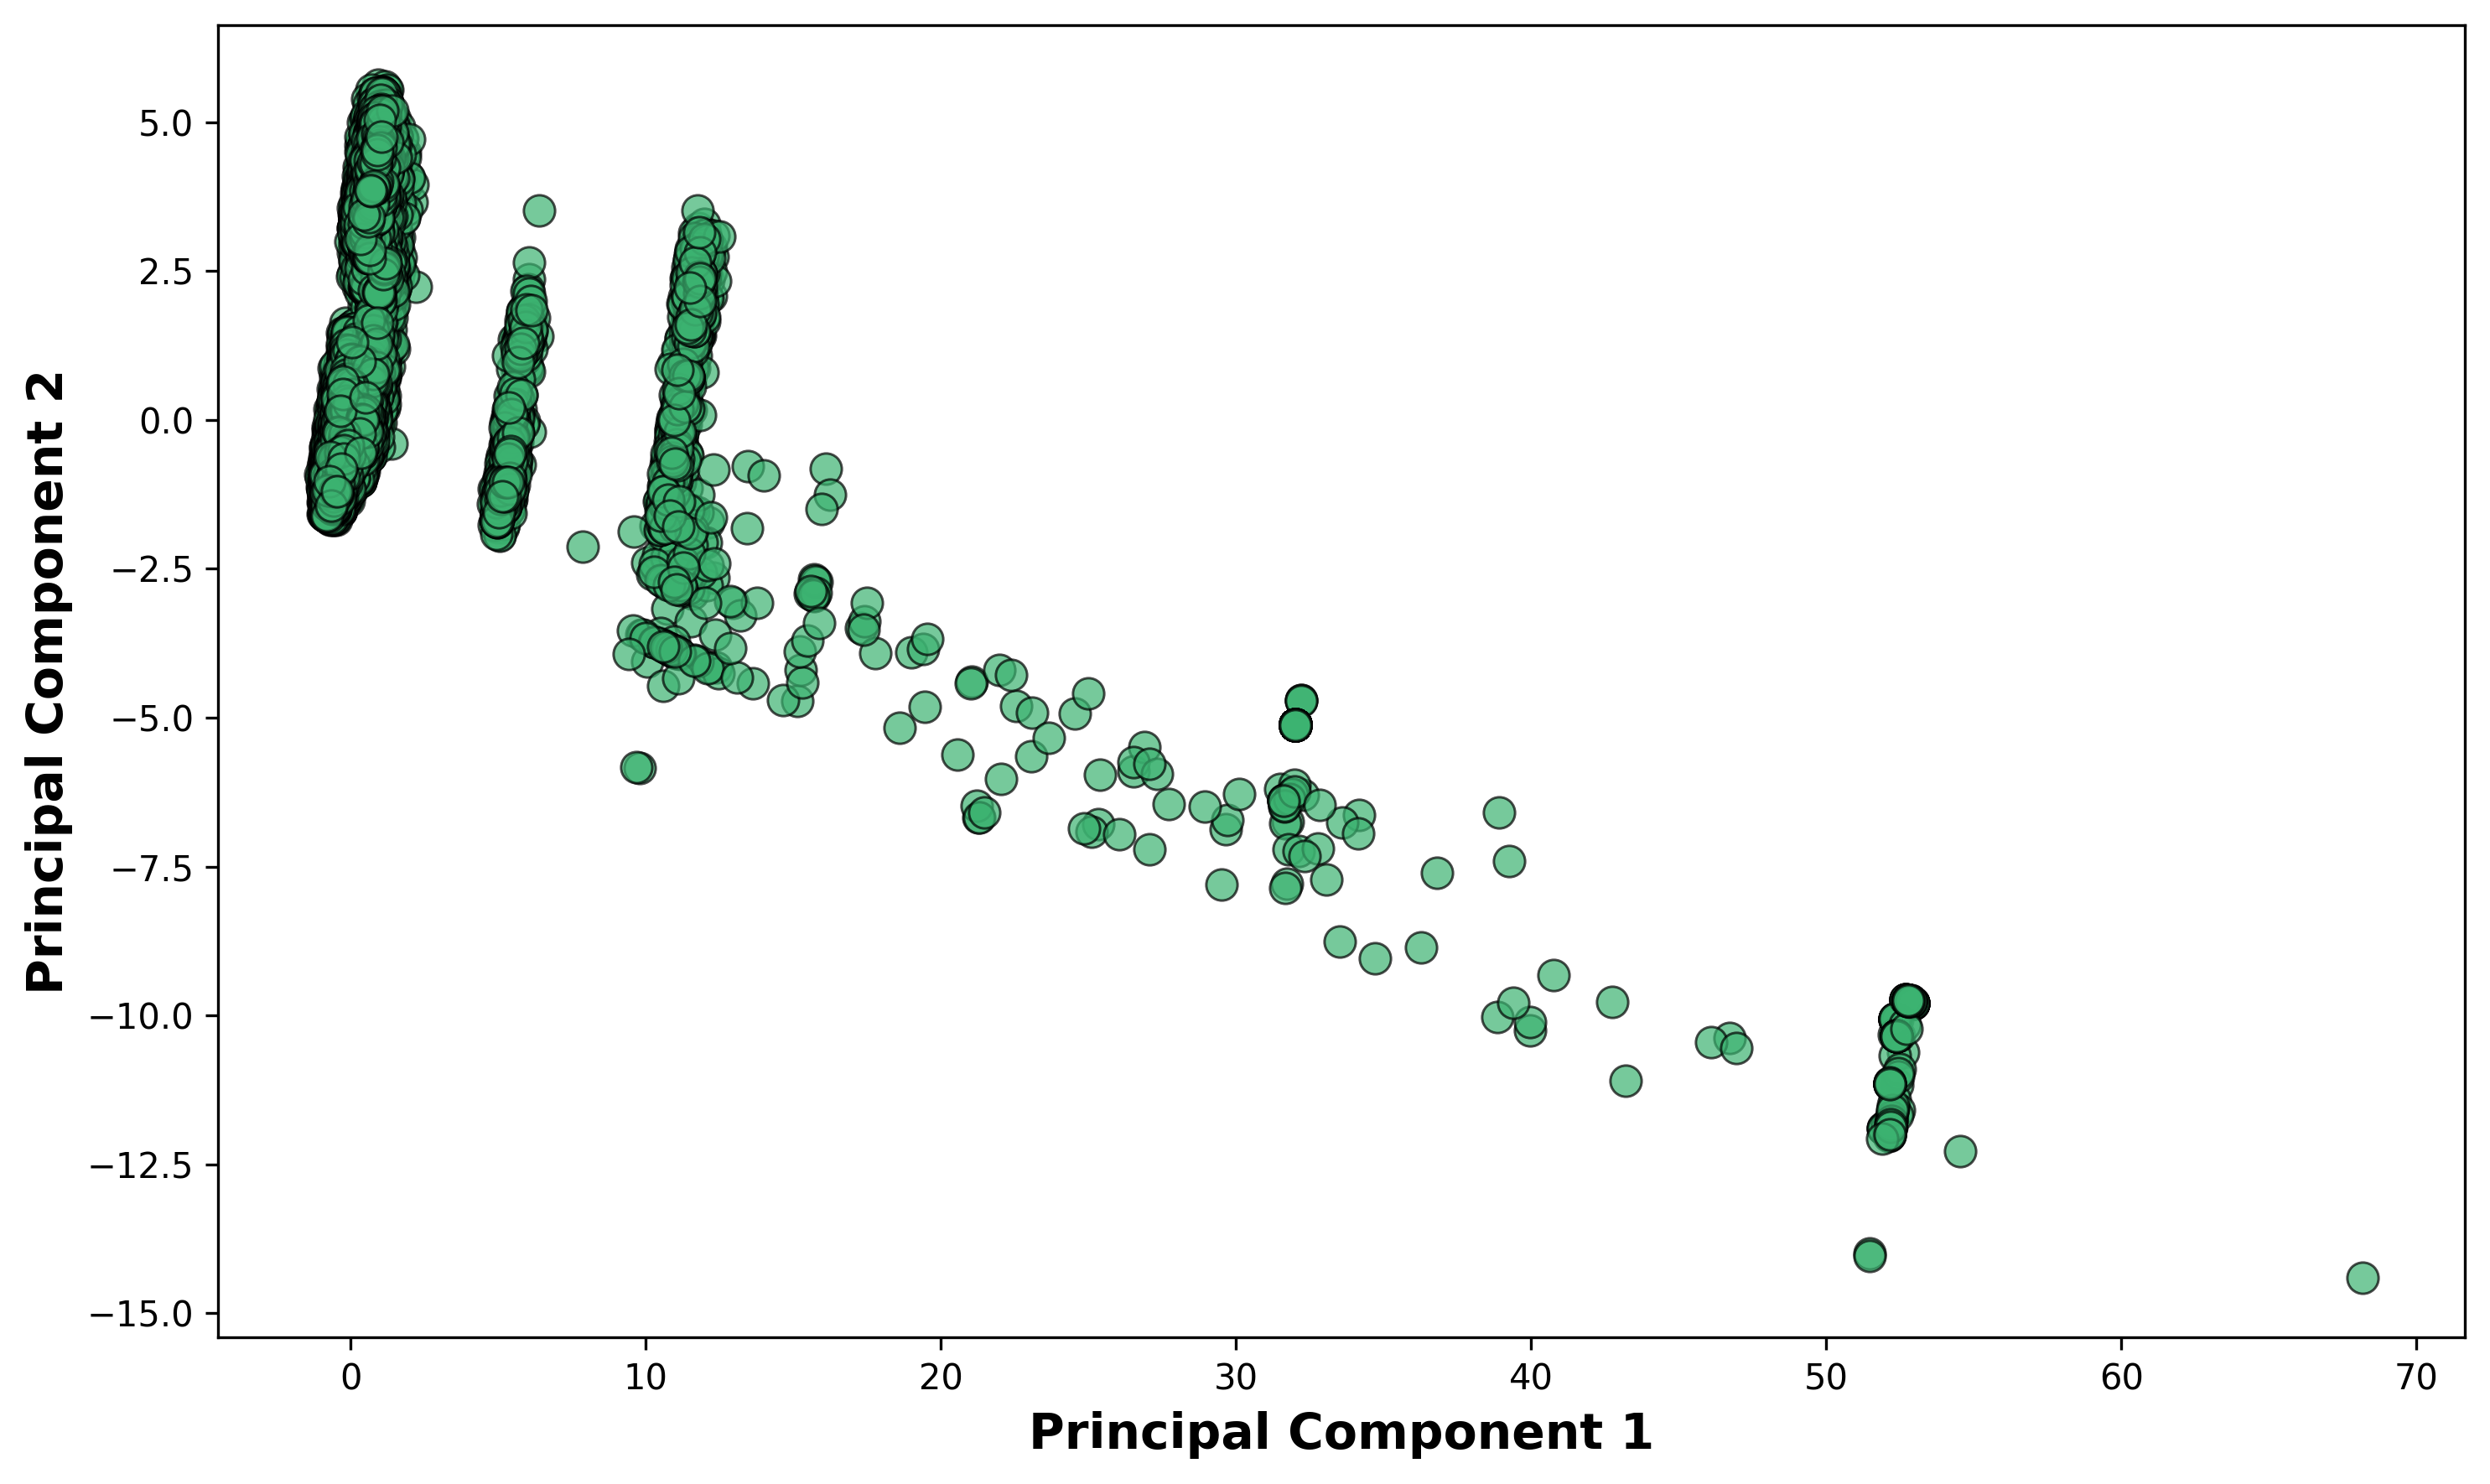

Explained Variance by PC1: 20.03%
Explained Variance by PC2: 13.40%


In [38]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("merged_ecg_data_cleaned.csv")

# Display first few rows to inspect the data
df.head()

# Identify non-numeric columns (e.g., 'Sinus rhythm' could be in one of these columns)
non_numeric_columns = df.select_dtypes(include=['object']).columns
print(f"Non-numeric columns: {non_numeric_columns}")

# Handle categorical data:
# Option 1: Label Encoding for categorical columns with string labels like 'Sinus rhythm'
label_encoder = LabelEncoder()
for column in non_numeric_columns:
    if df[column].dtype == 'object':  # Check if the column is categorical
        df[column] = label_encoder.fit_transform(df[column])

# Drop non-numeric columns if they are not useful for PCA
df.drop(columns=['subject_id', 'study_id', 'cart_id', 'wct_label_encoded'], inplace=True)

# -------------------------- Handling Missing Values -------------------------
# Impute missing values with the median (can also be mean or mode depending on data)
imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Perform scaling on the numeric features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_imputed)

# Perform PCA to reduce dimensions for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

# Convert PCA results into a DataFrame
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

# Scatter Plot of PCA Components
plt.figure(figsize=(10, 6), dpi=300)
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], alpha=0.7, color='mediumseagreen', edgecolor='black', s=80)
plt.xlabel("Principal Component 1", fontsize=14, fontweight='bold')
plt.ylabel("Principal Component 2", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig("pca_visualization.png", dpi=300)
plt.show()

# Print PCA Explained Variance Ratio
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance by PC1: {explained_variance[0]*100:.2f}%")
print(f"Explained Variance by PC2: {explained_variance[1]*100:.2f}%")


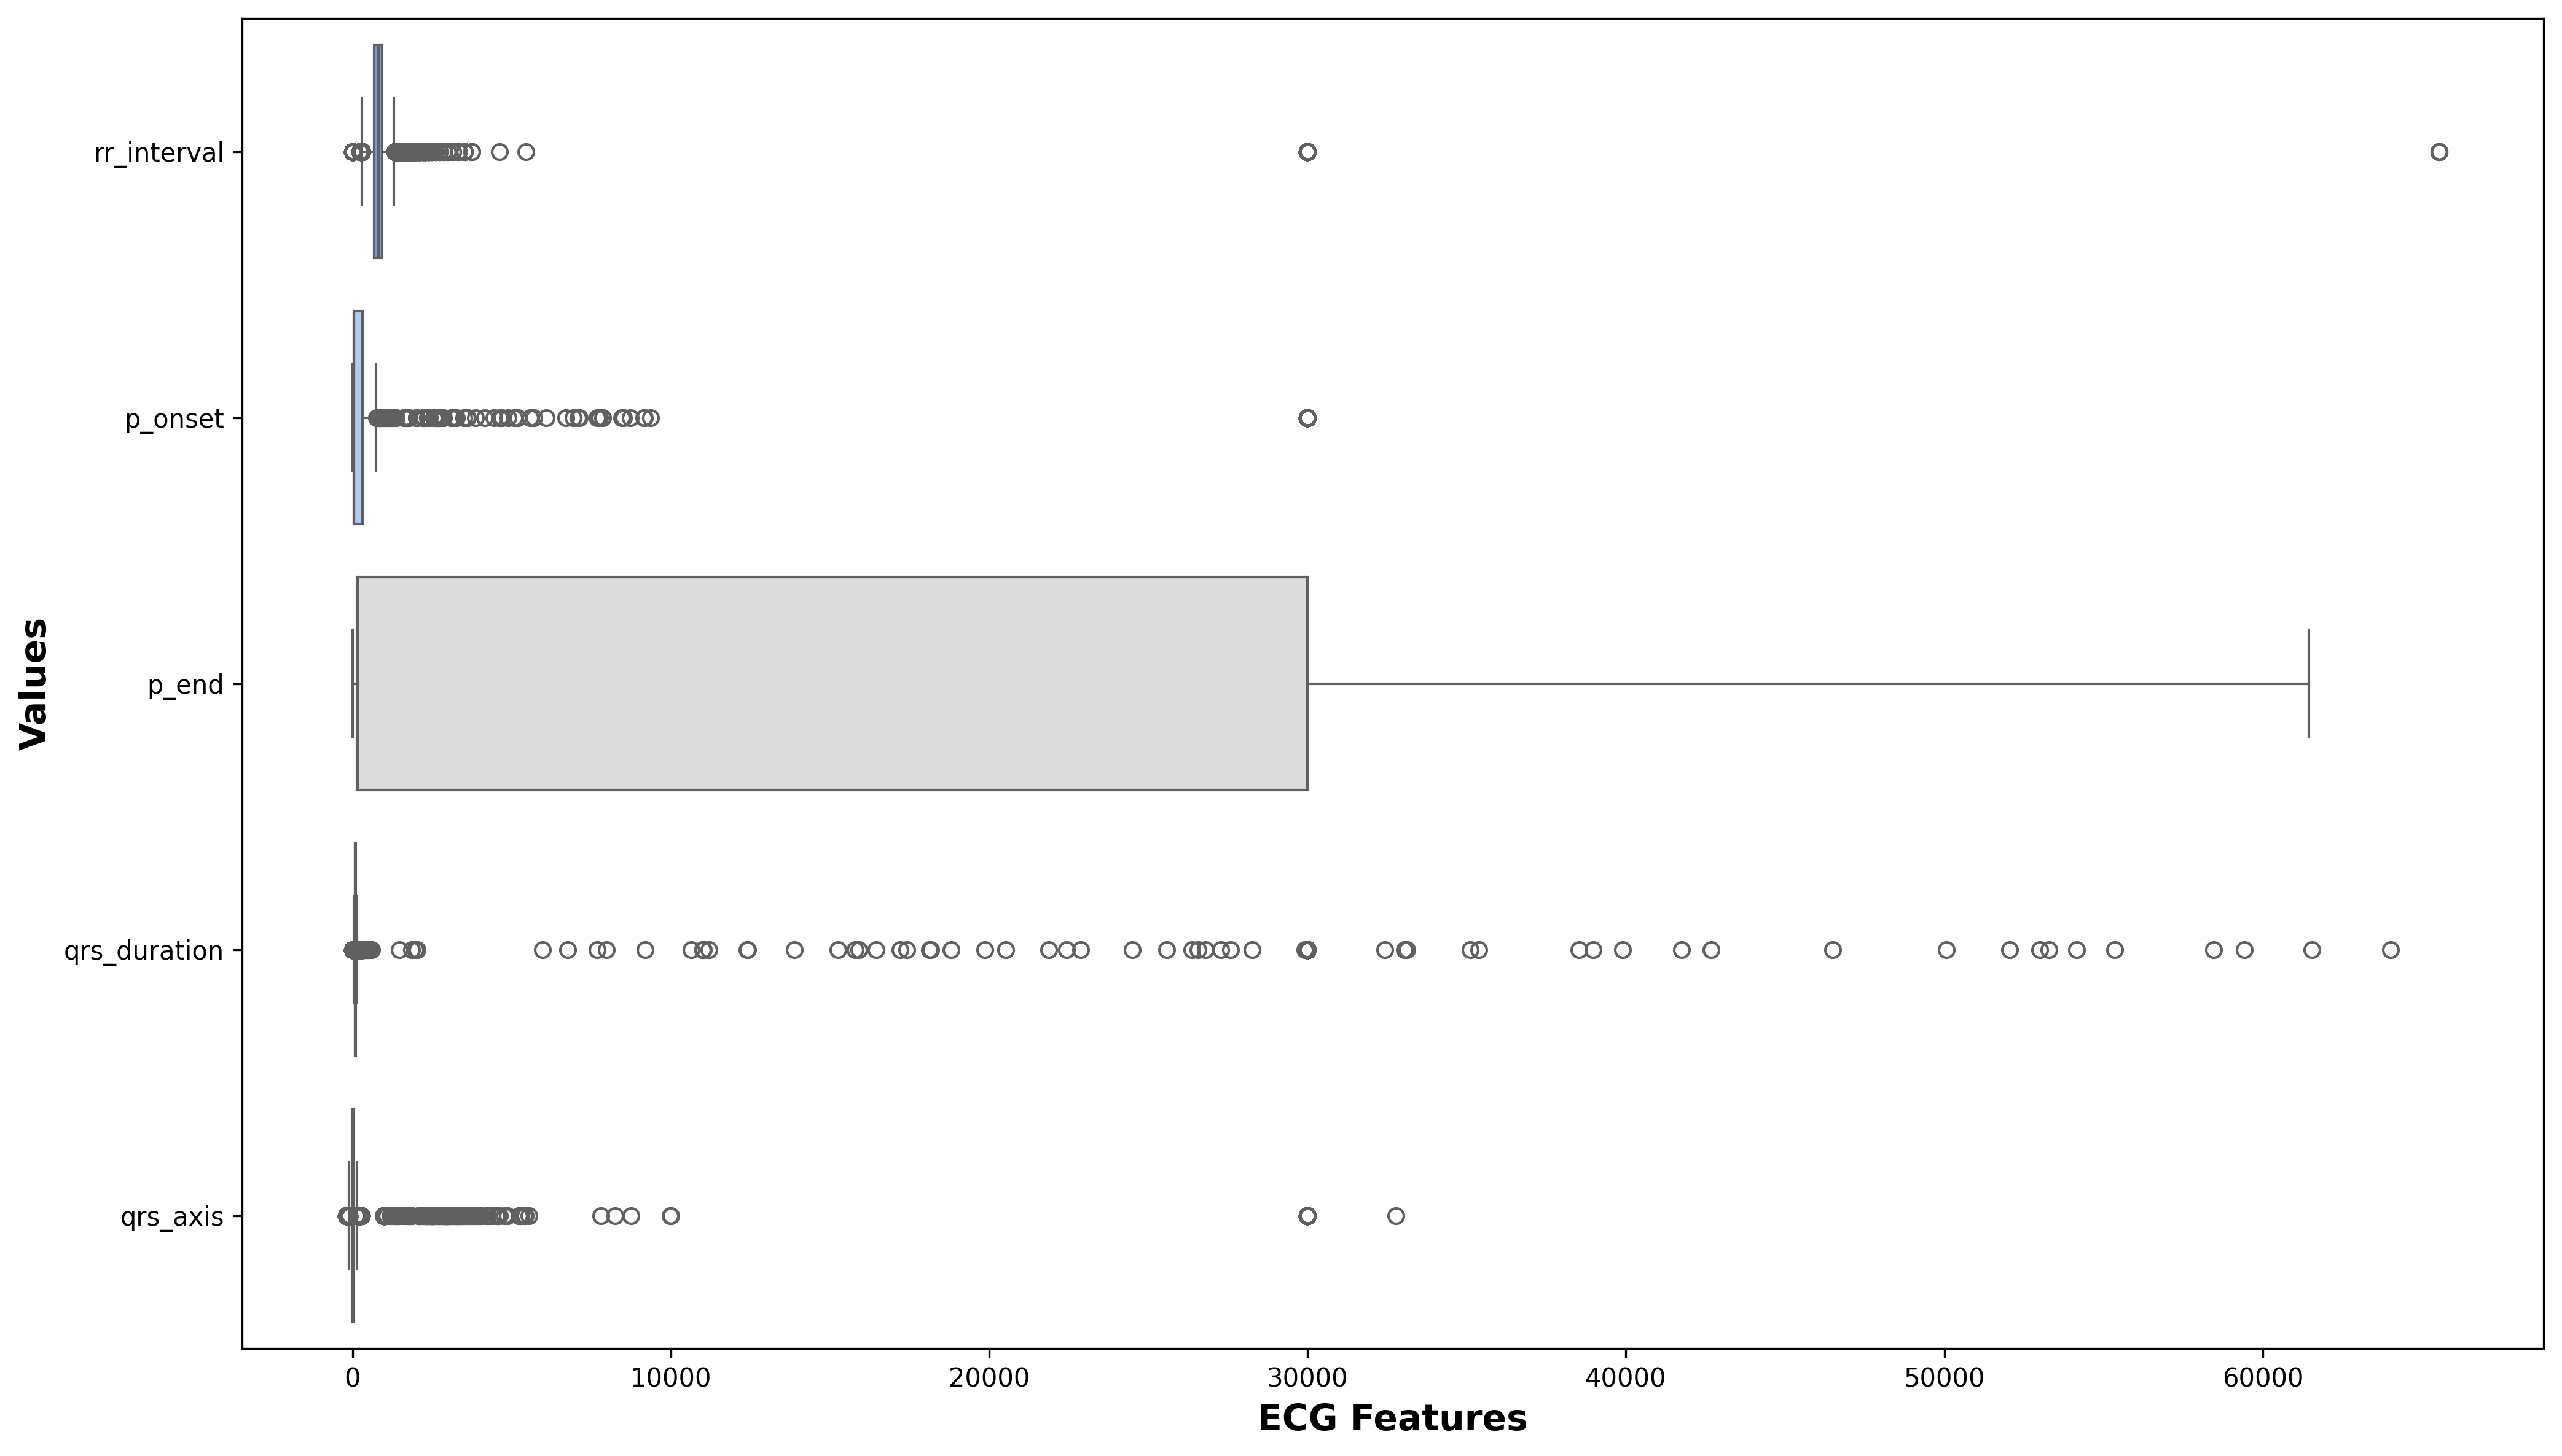

In [39]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Create boxplots to compare feature variability
plt.figure(figsize=(14, 8), dpi=300)  # Increase figure size and resolution for high quality
sns.boxplot(data=df[['rr_interval', 'p_onset', 'p_end', 'qrs_duration', 'qrs_axis']], 
            orient='h', 
            palette="coolwarm")  # Choose a visually pleasing color palette

# Add labels and title for better understanding
plt.xlabel("ECG Features", fontsize=14, fontweight='bold')
plt.ylabel("Values", fontsize=14, fontweight='bold')

# Adjust layout for better spacing
plt.tight_layout()

# Save the high-quality plot
plt.savefig("ecg_feature_boxplot.png", dpi=300)

# Show the plot
plt.show()
